# Time-Series Data

## What is Time-Series Data?
Any data that varies along the time dimension is called Time-Series data. e.g.:
- Sales of ice cream per day in the Senior Common Room at Imperial College - univariate
- Average price of the Apple stock by day - univariate
- The closing value of FTSE100 by day - univariate
- Average daily temperatures in Australia - univariate
- The complete text of 1984 by George Orwell
- EEG data - multivariate
- Room occupancy sensor data - multivariate

## What can we do with time-series?
- Forecasting - predict the future!
- Generate text - e.g. autocomplete
- Anomaly detection - e.g. detect a siezure happening/about to happen from EEG data
- Classification - e.g. room occupied/not occupied, sentiment analysis of text

## What makes time-series data special?
- There is a concept of "past" and "future" in time-series data
- In the case of Forecasting, the model must be retrained after essentially every prediction
- Non-stationary probability distribution of data

Although there is a large number of classical time-series methods that work really well, we are going to focus on Neural Networks in this session. 

The neural networks we have seen so far have no concept of _order_ in inputs. Each time a fresh input is presented, it is treated in isolation by the NN architectures we have seen so far. In time-series analysis, the _context_ is extremely important, i.e. what came before this?


## Recurrent Neural Networks (RNNs)

Recurrent Neural Networks (RNNs) solve this problem by incorporating loops within them. The loop signifies that information can persist from one set of inputs to another. 

<img src="RNN-rolled.png" width=200 />

This network accepts input _x<sub>t</sub>_ and provides output _h<sub>t</sub>_ at every step _t_. 

The network can also be seen in the following _unrolled_ visualisation:

<img src="RNN-unrolled.png" width=600 />


Simple RNNs, however, suffer from problems of _short-term memory_. 

![](LSTM.png)


For example, try to predict the last word in the sentence: **There are so many clouds in the _sky_.**

This is easy for a simple RNN to predict as the necessary context word _clouds_ appeared just two words ago. 

However, look at the following example: **I grew up in France... I speak fluent _French_** 

The distance between the contextual clue word _France_ and the predicted work _French_ could have been arbitrarily long in this text. Simple RNNs have trouble learning to connect such contextual references that appear far away from each other. 

Hence, Long Short term Memory - LSTM. 

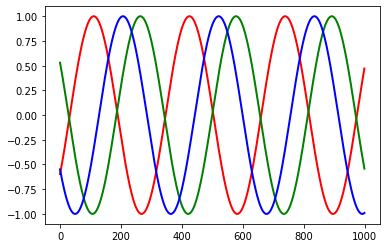

In [23]:
import numpy as np
import torch

np.random.seed(2)


T = 50
L = 1000
N = 3

x = np.empty((N, L), 'int64')
x[:] = np.array(range(L)) + np.random.randint(-4 * T, 4 * T, N).reshape(N, 1)
data = np.sin(x / 1.0 / T).astype('float64')

for i, color in enumerate(["r", "g", "b"]):
    plt.plot(np.arange(L), data[i, :], color, linewidth = 2.0)
    
    
plt.show()

In [5]:
import torch.nn as nn


class Sequence(nn.Module):
    def __init__(self):
        super(Sequence, self).__init__()
        self.lstm1 = nn.LSTMCell(1, 51)
        self.lstm2 = nn.LSTMCell(51, 51)
        self.linear = nn.Linear(51, 1)

    def forward(self, input, future = 0):
        outputs = []
        h_t = torch.zeros(input.size(0), 51, dtype=torch.double)
        c_t = torch.zeros(input.size(0), 51, dtype=torch.double)
        h_t2 = torch.zeros(input.size(0), 51, dtype=torch.double)
        c_t2 = torch.zeros(input.size(0), 51, dtype=torch.double)

        for i, input_t in enumerate(input.chunk(input.size(1), dim=1)):
            h_t, c_t = self.lstm1(input_t, (h_t, c_t))
            h_t2, c_t2 = self.lstm2(h_t, (h_t2, c_t2))
            output = self.linear(h_t2)
            outputs += [output]
        for i in range(future):# if we should predict the future
            h_t, c_t = self.lstm1(output, (h_t, c_t))
            h_t2, c_t2 = self.lstm2(h_t, (h_t2, c_t2))
            output = self.linear(h_t2)
            outputs += [output]
        outputs = torch.stack(outputs, 1).squeeze(2)
        return outputs

STEP:  0
loss: 0.5022694486939179
loss: 0.49844419034893345
loss: 0.4790187339322677
loss: 0.4467795856893803
loss: 0.3505210334228263
loss: 0.20449807667128855
loss: 2.4217966938539734
loss: 0.04319869682605436
loss: 0.03174847194538557
loss: 0.028691207198897707
loss: 0.027582283973276504
loss: 0.025315954636243067
loss: 0.021582074319223692
loss: 0.015535336535441577
loss: 0.009840748677150353
loss: 0.008522489052805676
loss: 0.007697646233074096
loss: 0.004762288092898233
loss: 0.002958860339431481
loss: 0.001691416853462823
test loss: 0.0011315493963882288


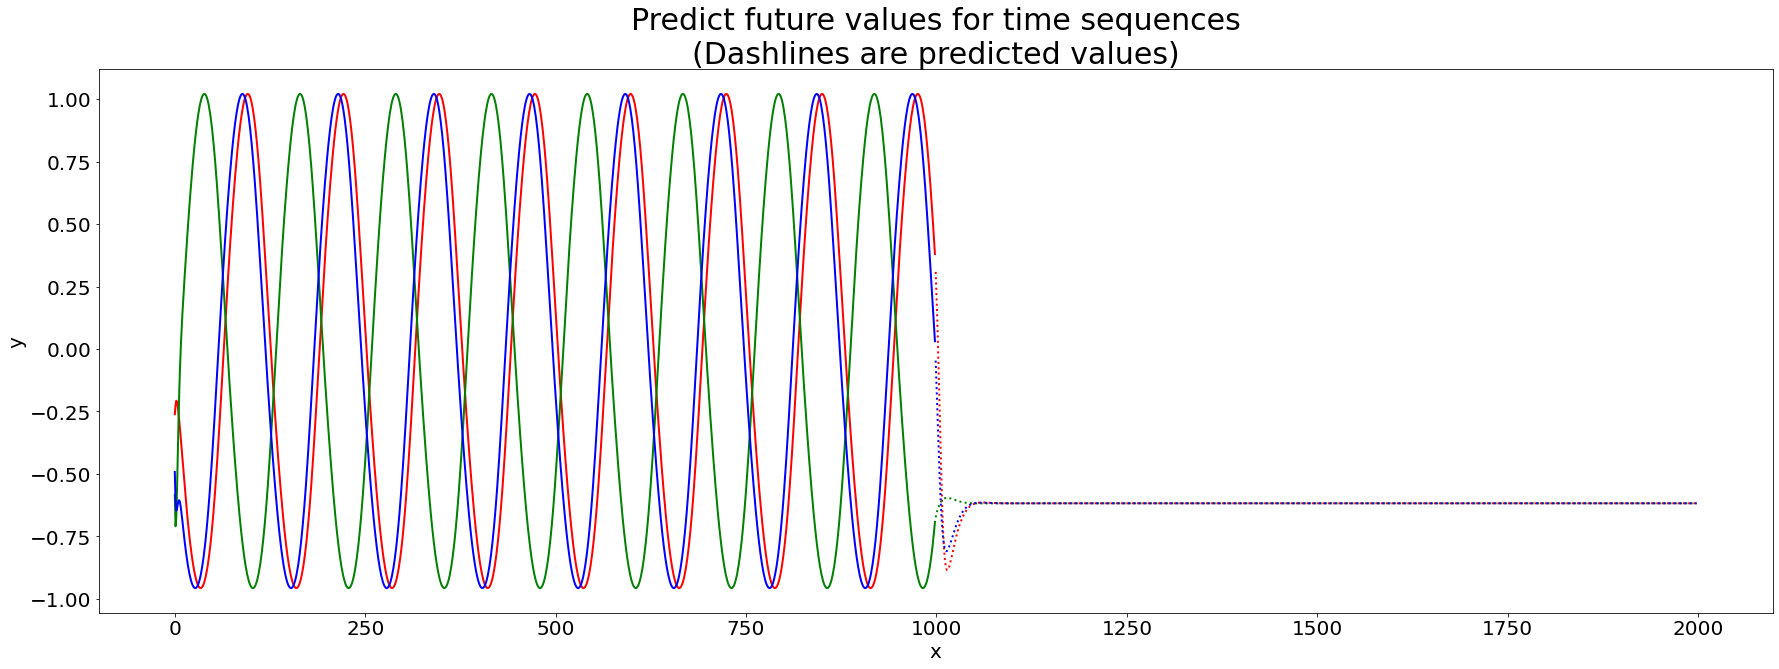

STEP:  1
loss: 0.001164791290488767
loss: 0.001102095954833929
loss: 0.0010007769994046878
loss: 0.0007954513934382513
loss: 0.0007410476185782057
loss: 0.0007140980232377061
loss: 0.0006725898149140009
loss: 0.0006086449731670506
loss: 0.0004993375513621078
loss: 0.0003499631260174915
loss: 0.0002699786028383566
loss: 0.0002568532088831621
loss: 0.00025523239537294384
loss: 0.00025503172713412165
loss: 0.0002547778865910343
loss: 0.00025435814816535904
loss: 0.00025376402079085343
loss: 0.00025225454992734237
loss: 0.00024566292553312064
loss: 0.00023282139329596855
test loss: 0.00010798627103866762


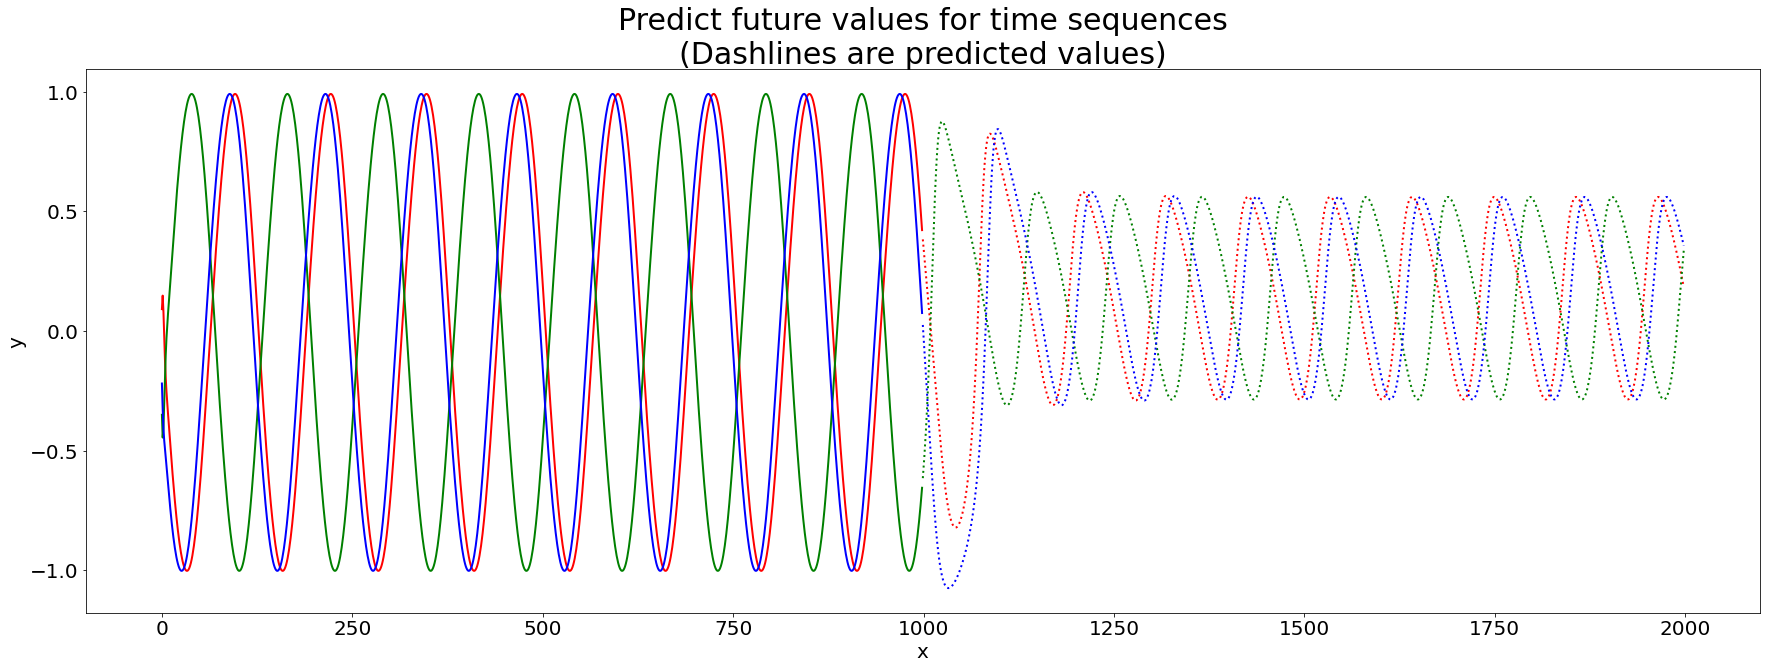

STEP:  2
loss: 0.00022026618315553614
loss: 0.00020325394666898325
loss: 0.0001847682471210343
loss: 0.00017520729474225405
loss: 0.00017373486281317663
loss: 0.0001734180131272102
loss: 0.00017323631959500975
loss: 0.00017299662211540208
loss: 0.00017268272793013082
loss: 0.00017229257102075105
loss: 0.00017177616420726126
loss: 0.00017083931442567286
loss: 0.0001684814913568416
loss: 0.00016293974213740255
loss: 0.0001546389029378904
loss: 0.00014464262946808028
loss: 0.00013661094033800764
loss: 0.00013156742018260572
loss: 0.00012768214918445686
loss: 0.00012332208112744852
test loss: 5.4052048529997976e-05


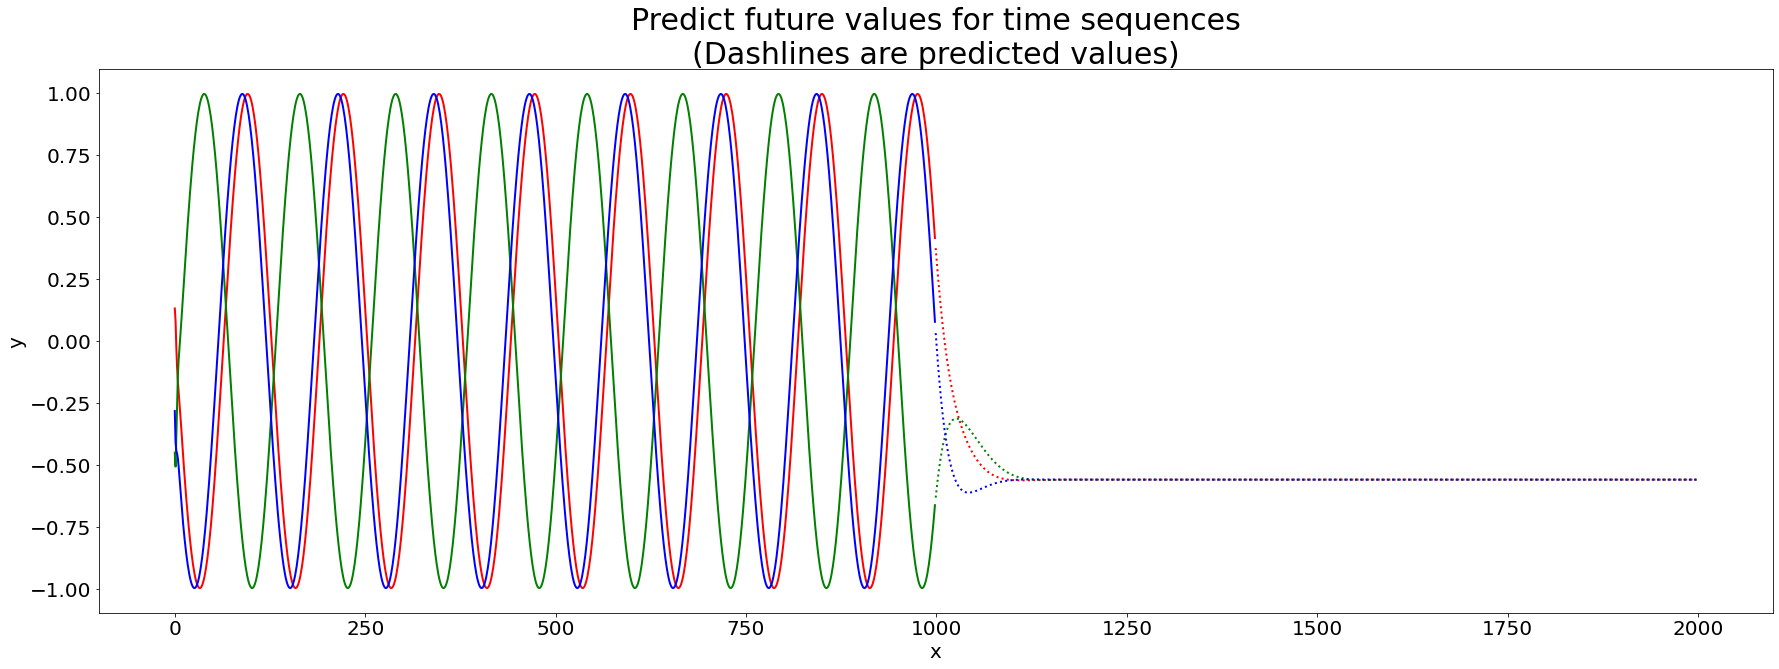

STEP:  3
loss: 0.00012223929698583765
loss: 0.00012102202781472336
loss: 0.00012045008199636979
loss: 0.00012007632384977544
loss: 0.00011937468645041321
loss: 0.00011791243968598306
loss: 0.00011462880153230376
loss: 0.00010773451639835262
loss: 9.525684758072037e-05
loss: 8.34277716383276e-05
loss: 0.0001865146571174088
loss: 6.49726244257803e-05
loss: 5.9508925849949245e-05
loss: 5.383105174389734e-05
loss: 4.83544367877622e-05
loss: 4.6206462058908365e-05
loss: 4.443661968051673e-05
loss: 4.317342108614757e-05
loss: 3.9477901231878935e-05
loss: 3.9129926814392496e-05
test loss: 2.8696441317792227e-05


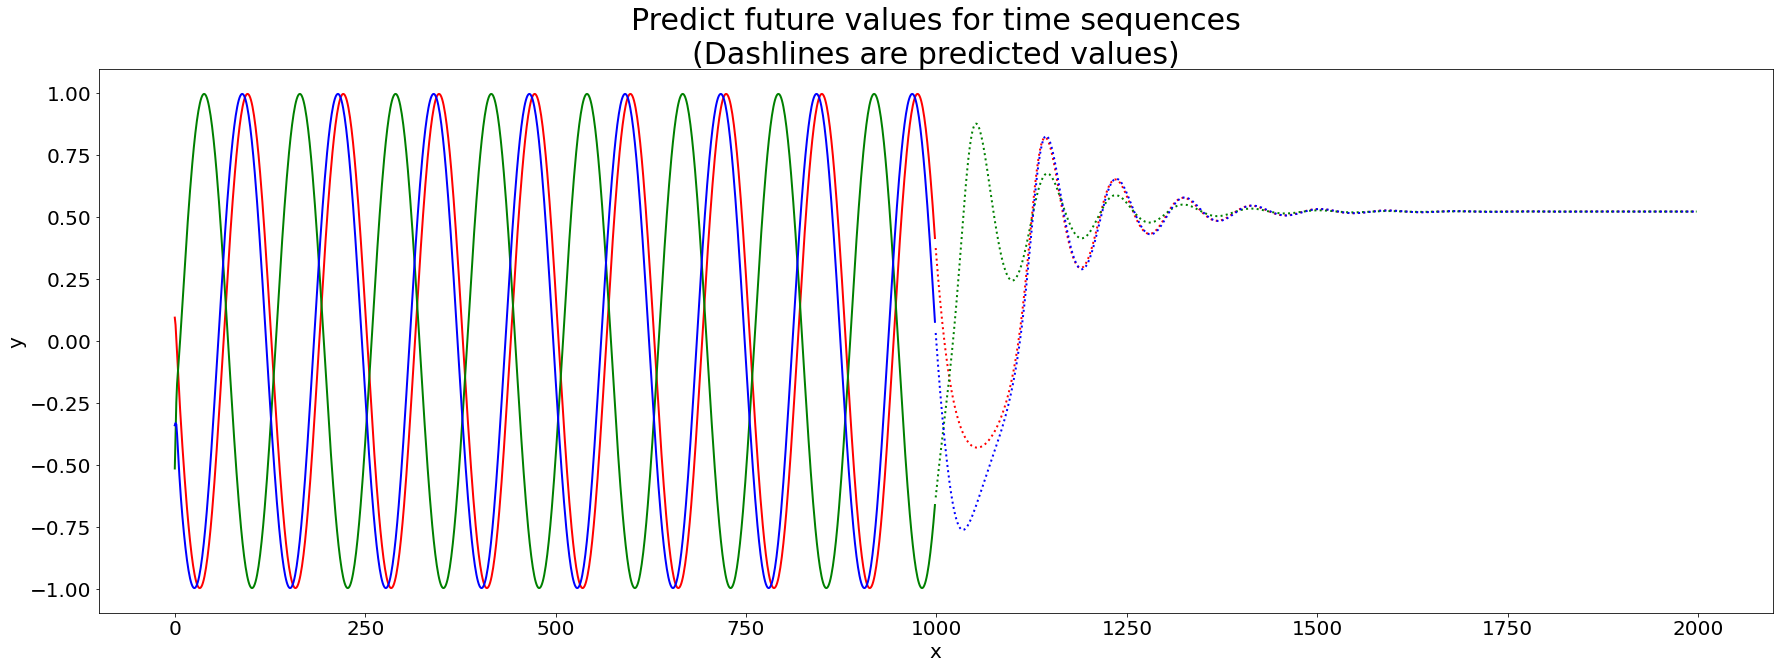

STEP:  4
loss: 3.6927036137916946e-05
loss: 3.522240629737936e-05
loss: 3.3177359688285644e-05
loss: 3.116472529252844e-05
loss: 2.9136234661893172e-05
loss: 2.8179734309647226e-05
loss: 2.7390648402863604e-05
loss: 2.702556656801786e-05
loss: 2.5561164916760564e-05
loss: 2.5164907622970218e-05
loss: 2.4623761181482897e-05
loss: 2.360430051613822e-05
loss: 2.2600833648186253e-05
loss: 2.1519937437081122e-05
loss: 2.0979063400740617e-05
loss: 2.0795453301669906e-05
loss: 2.0734057992254663e-05
loss: 2.069236808795021e-05
loss: 2.0631601212717746e-05
loss: 2.041752947766801e-05
test loss: 2.023149961725189e-05


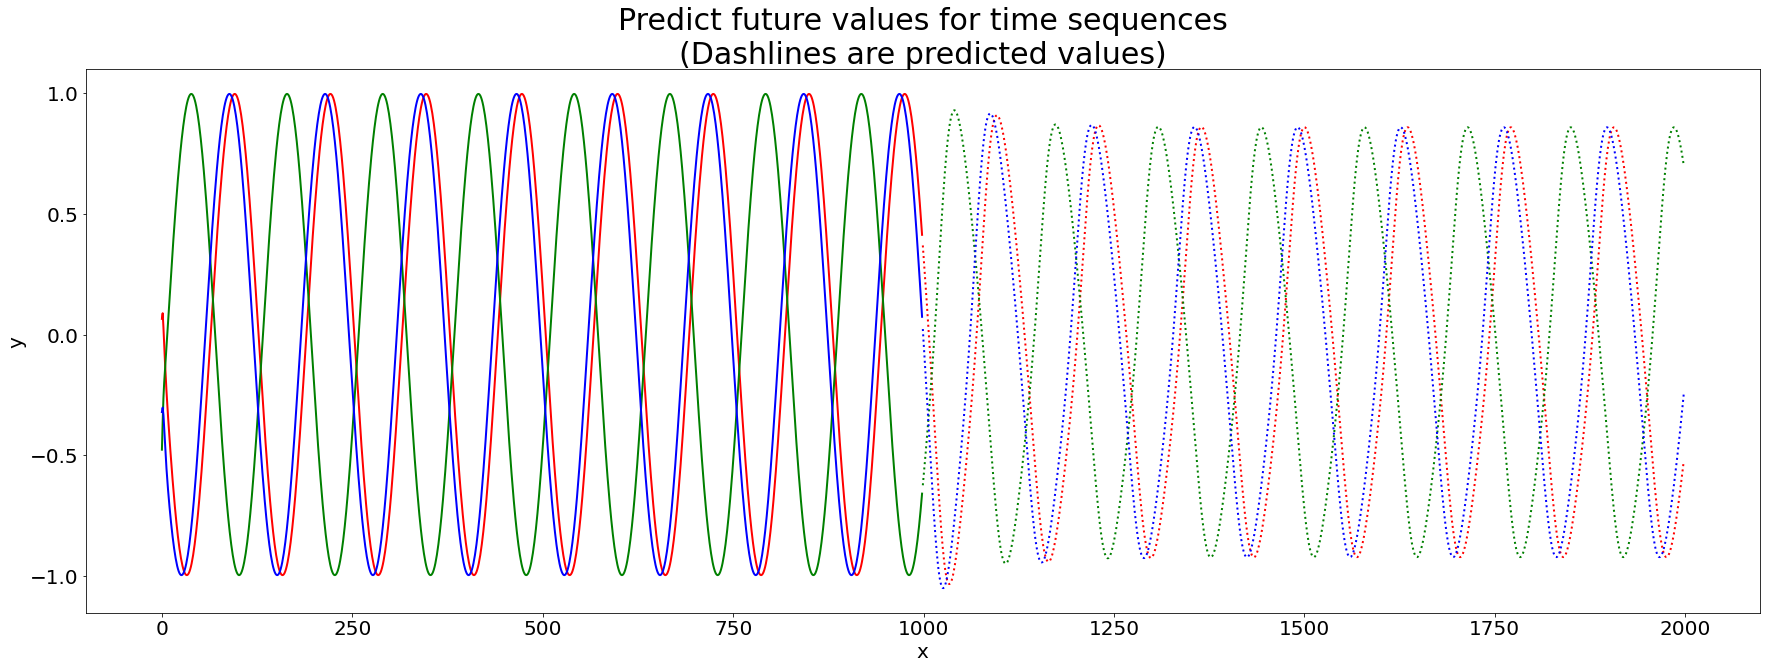

STEP:  5
loss: 2.0082977494437073e-05
loss: 1.9587043453207755e-05
loss: 1.9071615816723178e-05
loss: 1.8791144510279506e-05
loss: 1.8385947695197794e-05
loss: 1.814759599029655e-05
loss: 1.654464986933967e-05
loss: 1.537063504978533e-05
loss: 1.4489187888702999e-05
loss: 1.3309812758819415e-05
loss: 1.2572715260178096e-05
loss: 1.2750963911386193e-05
loss: 1.2135115417005898e-05
loss: 1.2047463468190805e-05
loss: 1.1957282243014958e-05
loss: 1.1864440579732621e-05
loss: 1.174452203553439e-05
loss: 1.1620584178945493e-05
loss: 1.1568702222973023e-05
loss: 1.154724677067411e-05
test loss: 1.2732367262081984e-05


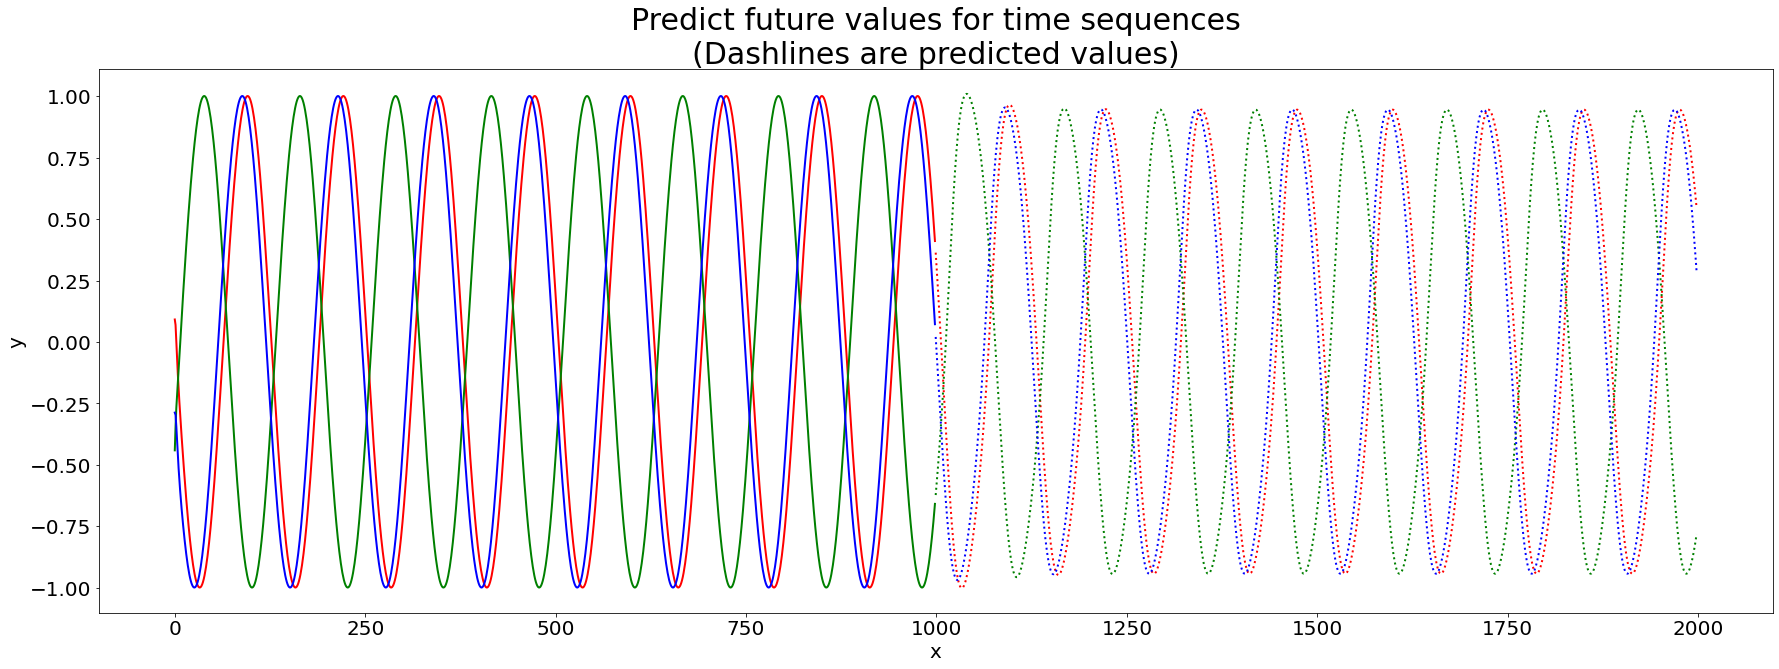

STEP:  6
loss: 1.15339087310508e-05
loss: 1.1413283424552288e-05
loss: 1.0845065689074448e-05
loss: 1.0303252028310462e-05
loss: 1.0129855417986817e-05
loss: 9.926090830928146e-06
loss: 9.902482715979974e-06
loss: 9.886080481742513e-06
loss: 9.869663770243275e-06
loss: 9.836798086204906e-06
loss: 9.803050368806159e-06
loss: 9.782660836454996e-06
loss: 9.757153490065162e-06
loss: 9.72556441372078e-06
loss: 9.693893391292e-06
loss: 9.668121099824094e-06
loss: 9.6352588763876e-06
loss: 9.565369918039682e-06
loss: 9.4144222146989e-06
loss: 9.066856530259052e-06
test loss: 1.1183760144511571e-05


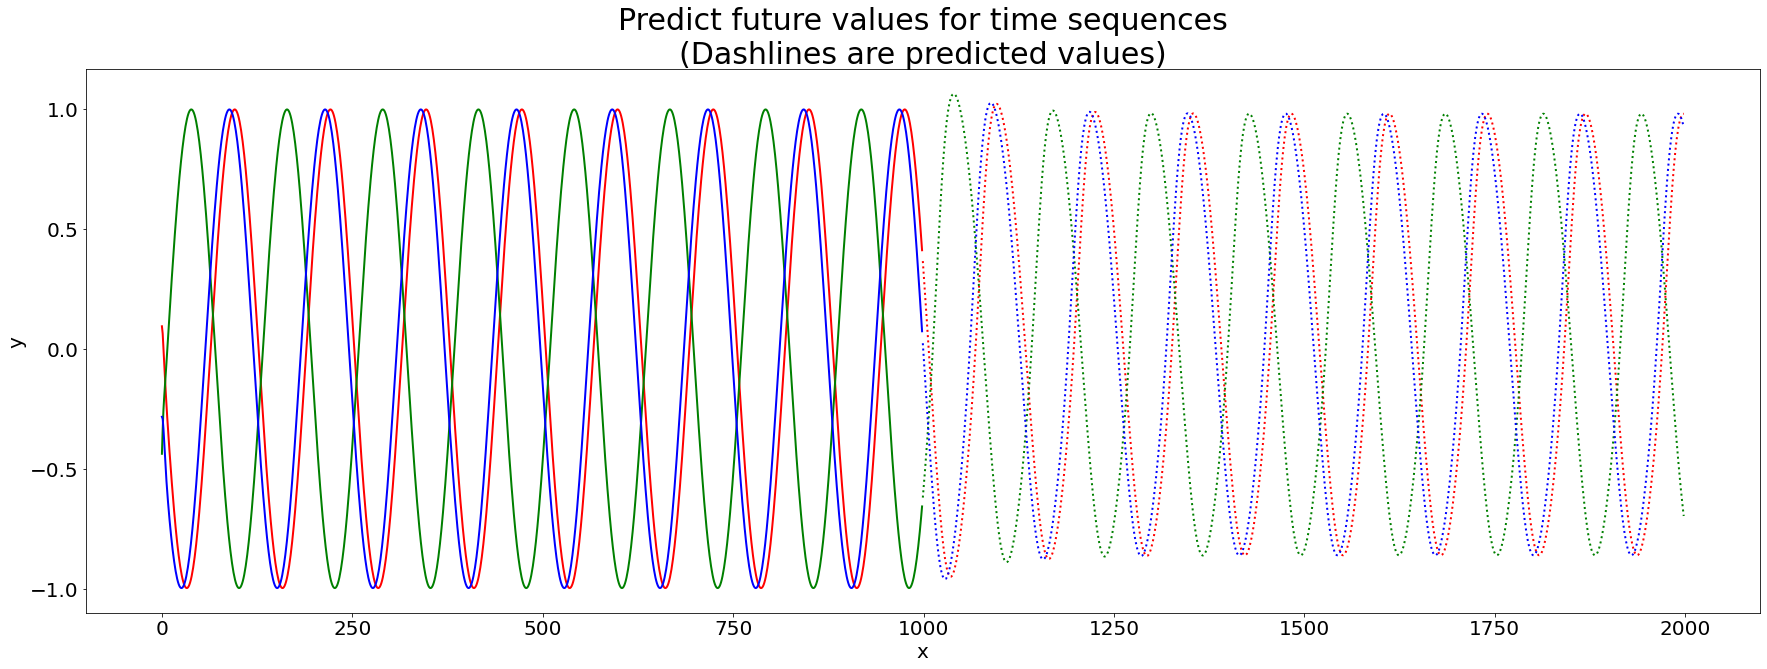

STEP:  7
loss: 8.918148150326603e-06
loss: 8.525867388590983e-06
loss: 8.307529149612726e-06
loss: 8.043687868764218e-06
loss: 7.938356828248623e-06
loss: 7.864514683623089e-06
loss: 7.958085900164903e-06
loss: 7.610468545404072e-06
loss: 7.530470336172754e-06
loss: 7.354552092714591e-06
loss: 7.229004669997183e-06
loss: 7.1505207694358084e-06
loss: 7.2427982065905895e-06
loss: 6.988402203356425e-06
loss: 6.943449207153101e-06
loss: 6.901408182015994e-06
loss: 6.819577373470559e-06
loss: 6.788034255122537e-06
loss: 6.83135762229986e-06
loss: 6.697149449752638e-06
test loss: 9.396829848107833e-06


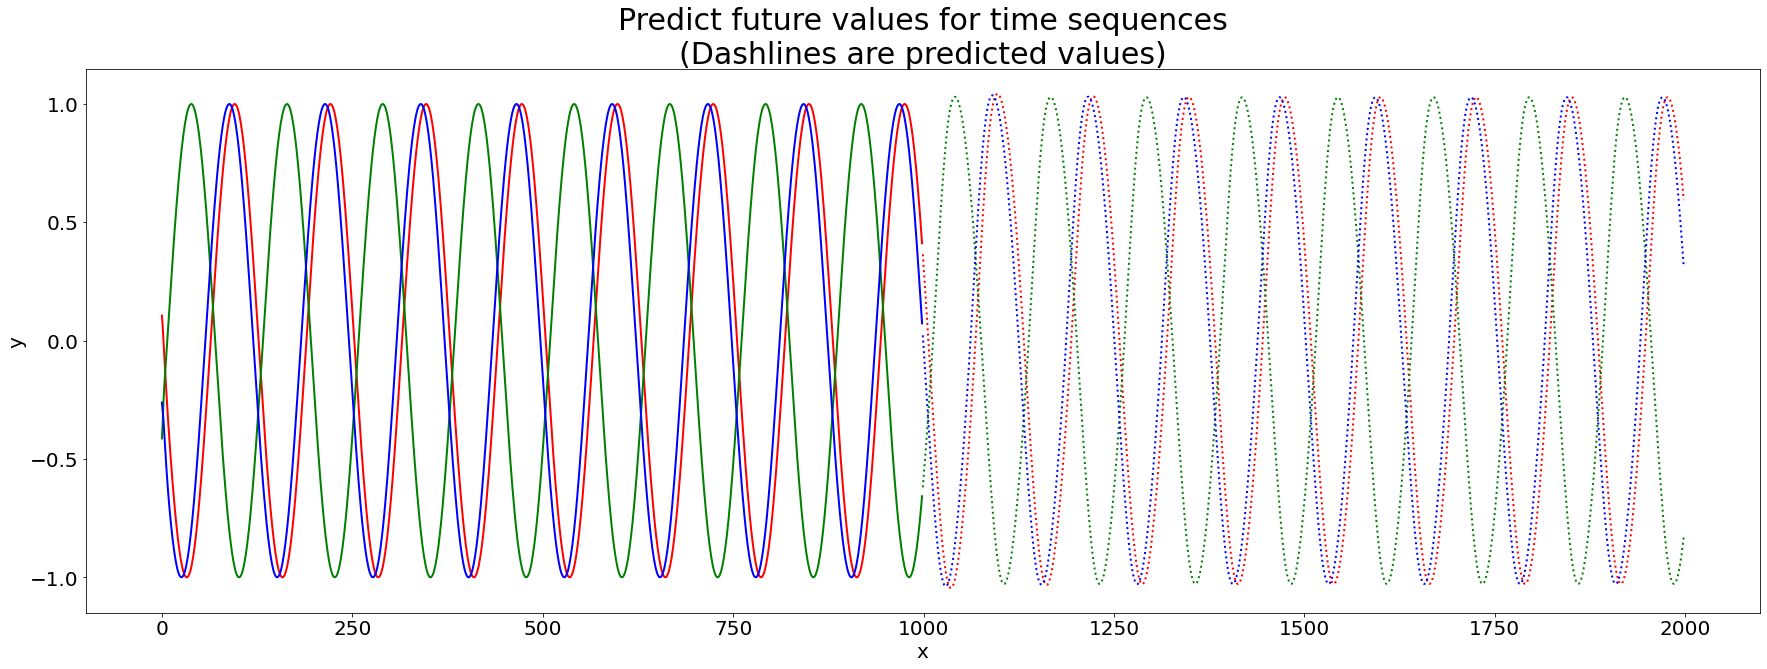

STEP:  8
loss: 6.671947026435305e-06
loss: 6.794330242018816e-06
loss: 6.60705697203315e-06
loss: 6.590823404394476e-06
loss: 6.746130359317309e-06
loss: 6.546164231256656e-06
loss: 6.53624204264491e-06
loss: 6.547471334623917e-06
loss: 6.5005154775030715e-06
loss: 6.492420294196113e-06
loss: 6.494604776521266e-06
loss: 6.4647260836843e-06
loss: 6.457273180783504e-06
loss: 6.43536154542634e-06
loss: 6.423418755185015e-06
loss: 6.409093129867171e-06
loss: 6.400355563782699e-06
loss: 6.390007840825881e-06
loss: 6.38121910783392e-06
loss: 6.3800564801531645e-06
test loss: 9.033581468313192e-06


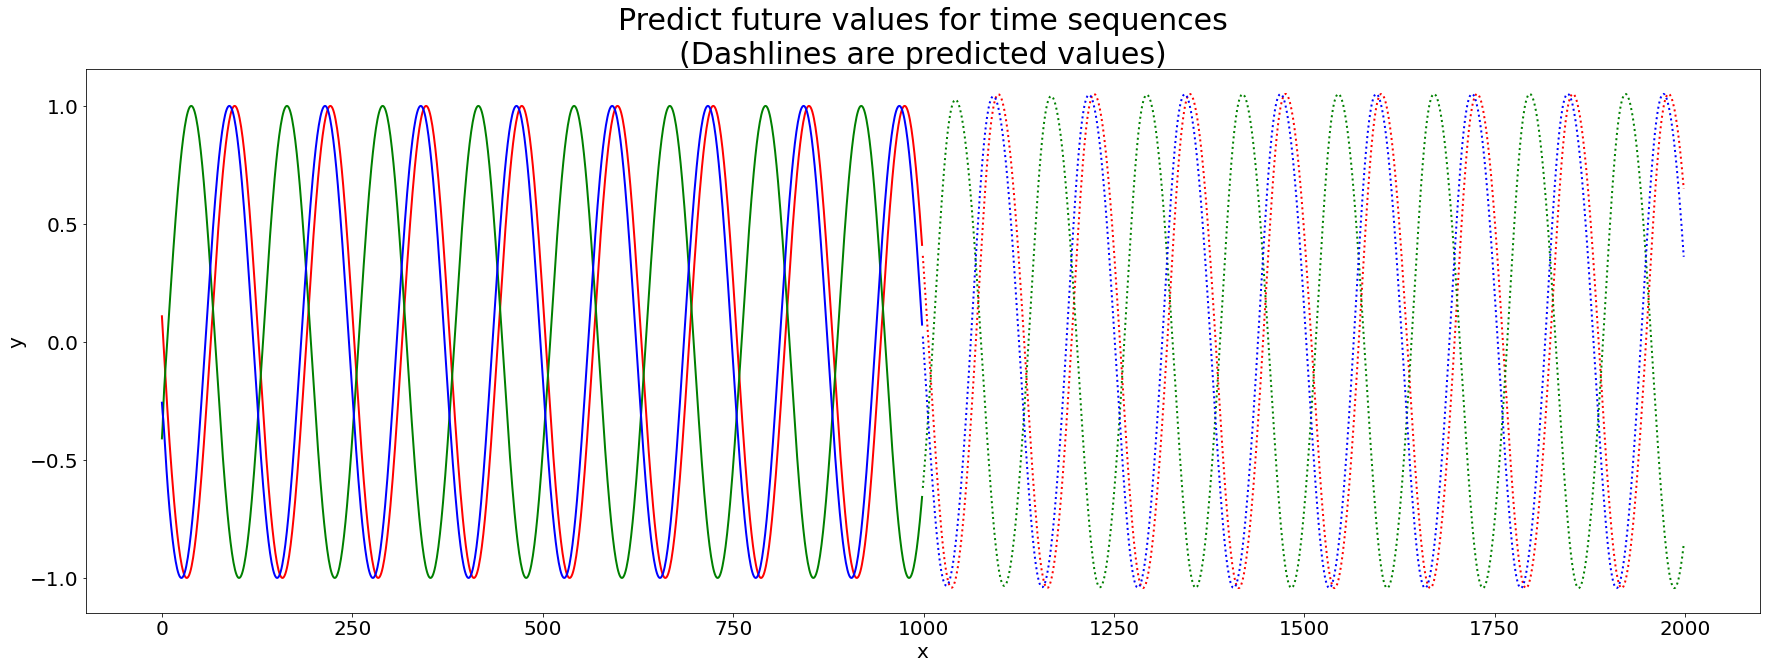

STEP:  9
loss: 6.367891640548935e-06
loss: 6.363216448612372e-06
loss: 6.389871787078565e-06
loss: 6.353682977097622e-06
loss: 6.351059308757662e-06
loss: 6.356706425858624e-06
loss: 6.342334952209382e-06
loss: 6.340075372755951e-06
loss: 6.355068954510089e-06
loss: 6.331117754790099e-06
loss: 6.328426585466559e-06
loss: 6.320774102091008e-06
loss: 6.31478021640492e-06
loss: 6.310949450066383e-06
loss: 6.301666264950104e-06
loss: 6.293658069192118e-06
loss: 6.281542400552269e-06
loss: 6.425314446643057e-06
loss: 6.260997871303055e-06
loss: 6.252732244754777e-06
test loss: 8.701143362148445e-06


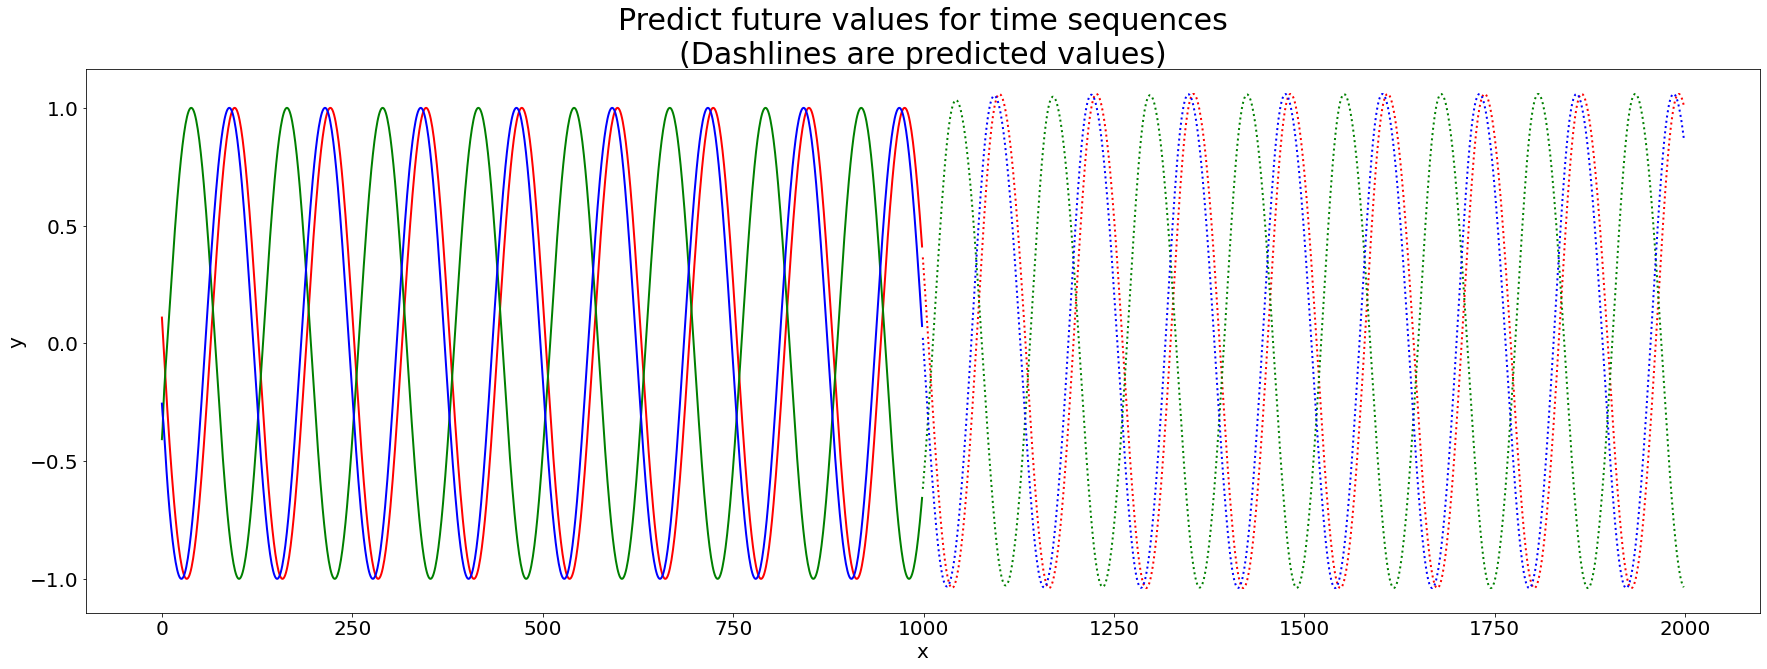

STEP:  10
loss: 6.2114905976635345e-06
loss: 6.203761466478346e-06
loss: 6.190955159582989e-06
loss: 6.281713529691431e-06
loss: 6.162953997566208e-06
loss: 6.152046871262803e-06
loss: 6.097657393805837e-06
loss: 6.080536700635598e-06
loss: 6.02620669348795e-06
loss: 5.96813645677422e-06
loss: 5.883189380285194e-06
loss: 6.552365549445086e-06
loss: 5.807911524082107e-06
loss: 5.800219598302921e-06
loss: 5.746612422285353e-06
loss: 5.648695673576234e-06
loss: 5.7266721413585035e-06
loss: 5.56198525680833e-06
loss: 5.5170317704690645e-06
loss: 5.408710301442069e-06
test loss: 8.081240903881534e-06


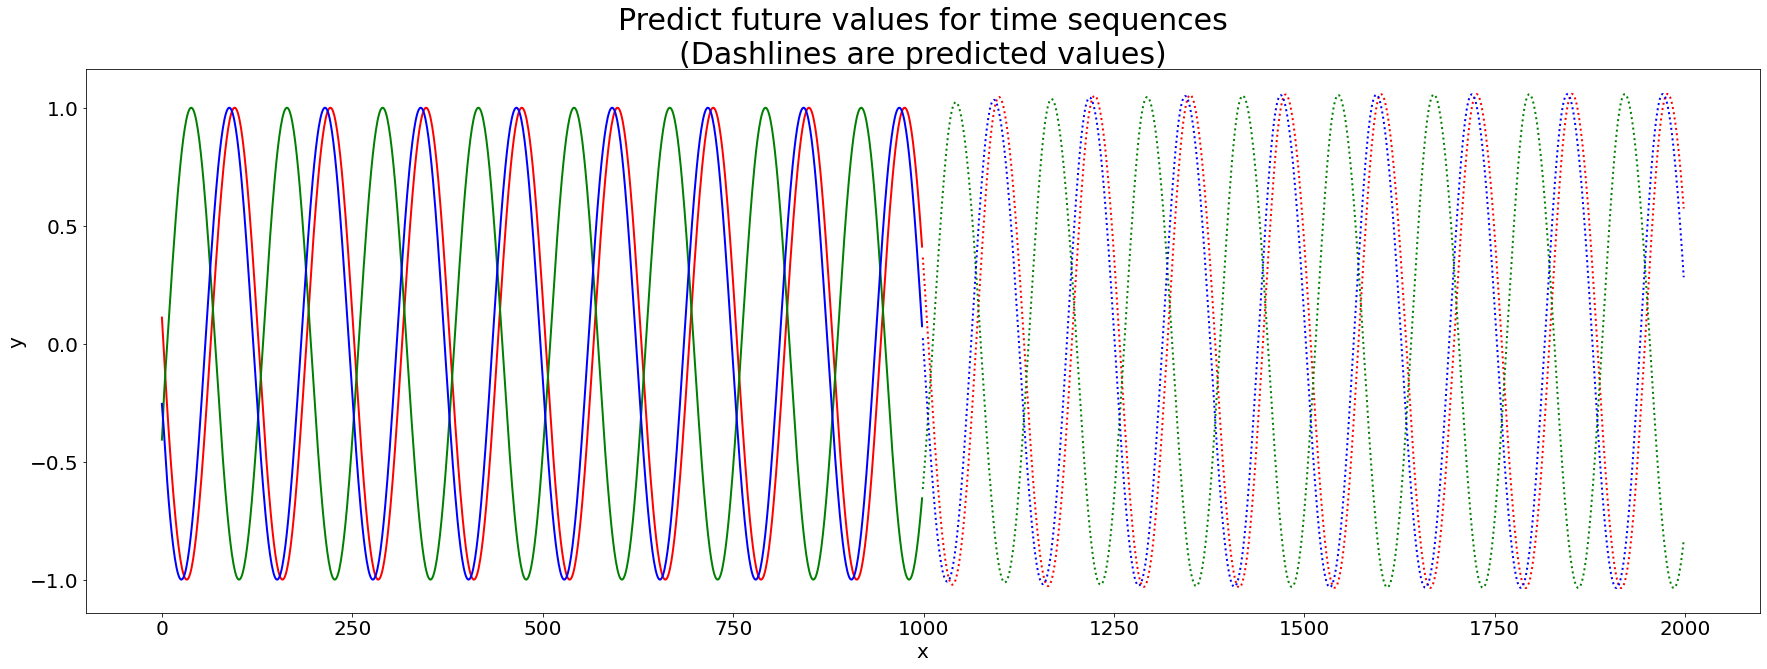

STEP:  11
loss: 5.3231933630466265e-06
loss: 5.244948756399701e-06
loss: 5.415303603672733e-06
loss: 5.099233061602846e-06
loss: 5.048904048108387e-06
loss: 7.196835890272621e-06
loss: 4.912716819049012e-06
loss: 4.883582897221914e-06
loss: 4.732797568976685e-06
loss: 5.807530572084005e-06
loss: 4.667464835012208e-06
loss: 4.646739301998413e-06
loss: 4.5934281947813484e-06
loss: 4.535476235402691e-06
loss: 4.589077713463363e-06
loss: 4.492613949990372e-06
loss: 4.48446335144738e-06
loss: 4.460826520376066e-06
loss: 4.454444226345951e-06
loss: 4.446654431454881e-06
test loss: 8.479839978112935e-06


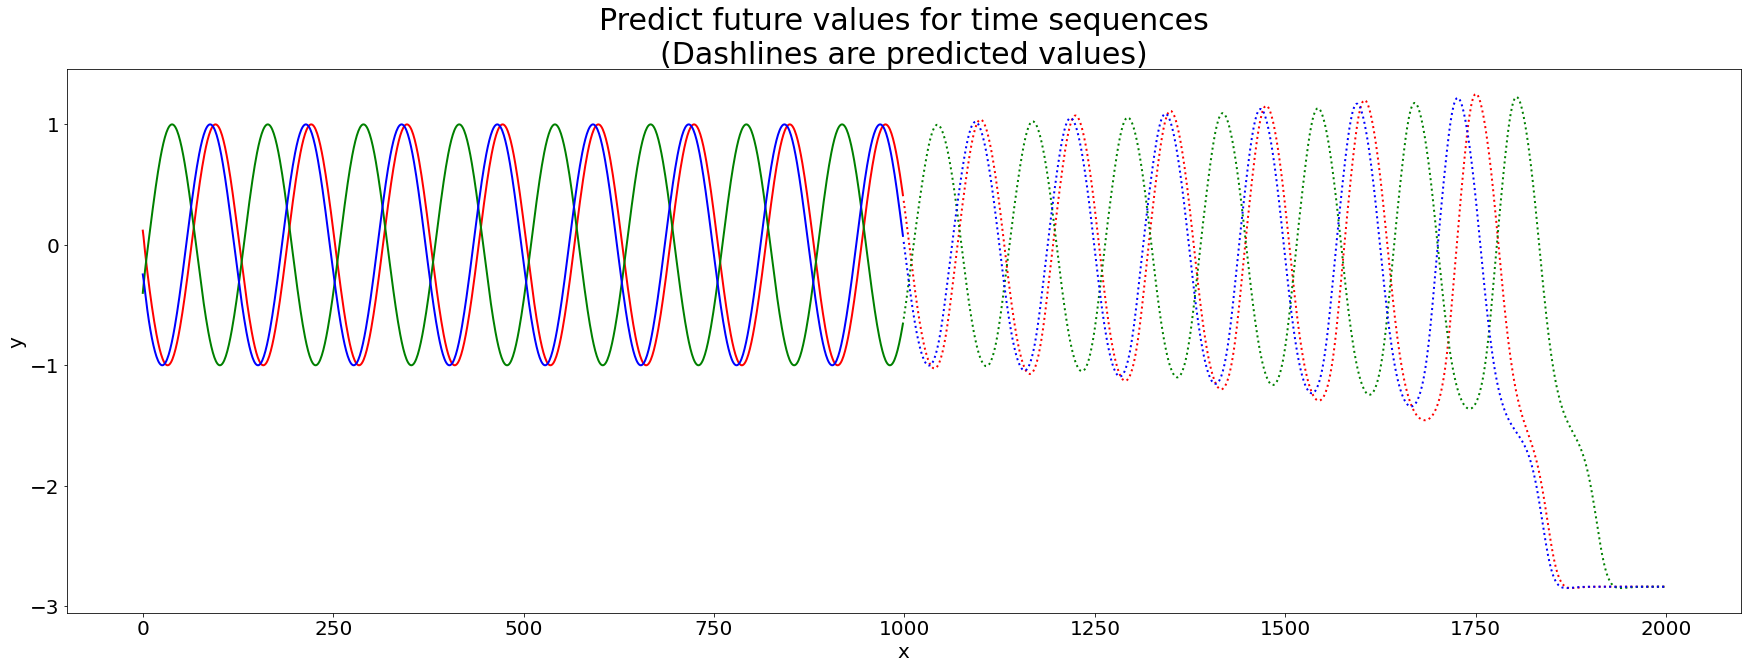

STEP:  12
loss: 4.437073799244836e-06
loss: 4.433378347390605e-06
loss: 4.429678082471881e-06
loss: 4.4128374164076385e-06
loss: 4.3989325807803346e-06
loss: 4.382353700502512e-06
loss: 4.365022911444429e-06
loss: 4.343086934263375e-06
loss: 4.320488125804998e-06
loss: 4.306624439256024e-06
loss: 4.294195168304163e-06
loss: 4.289154763855494e-06
loss: 4.287172998574361e-06
loss: 4.284268789182503e-06
loss: 4.27817190337094e-06
loss: 4.271077728150167e-06
loss: 4.255471719817835e-06
loss: 4.235268506366888e-06
loss: 4.210251481964645e-06
loss: 4.199905360381909e-06
test loss: 8.37060442248796e-06


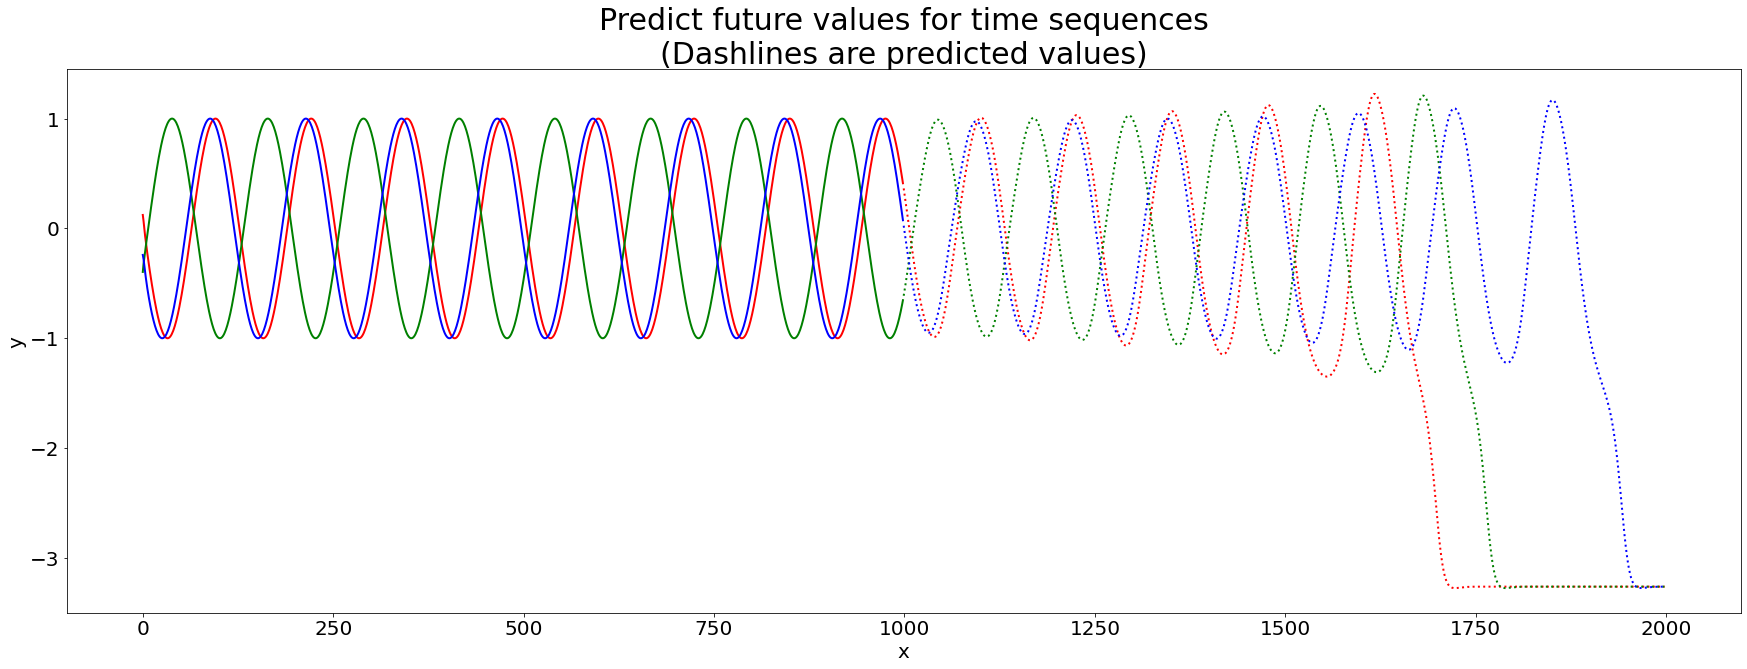

STEP:  13
loss: 4.170299219849016e-06
loss: 4.152745810518579e-06
loss: 4.1268891406606e-06
loss: 4.100771142804276e-06
loss: 4.07611837040007e-06
loss: 4.040792540248032e-06
loss: 3.984126464057971e-06
loss: 3.960459788155923e-06
loss: 3.896219983680833e-06
loss: 3.846560806718718e-06
loss: 3.7693874433190398e-06
loss: 3.7063306095837793e-06
loss: 3.7166009467056716e-06
loss: 3.674923685154598e-06
loss: 3.6635884729272386e-06
loss: 3.650870622606508e-06
loss: 3.6460270401028427e-06
loss: 3.643691877141592e-06
loss: 3.638725265038955e-06
loss: 3.6325179318987688e-06
test loss: 8.53627438878663e-06


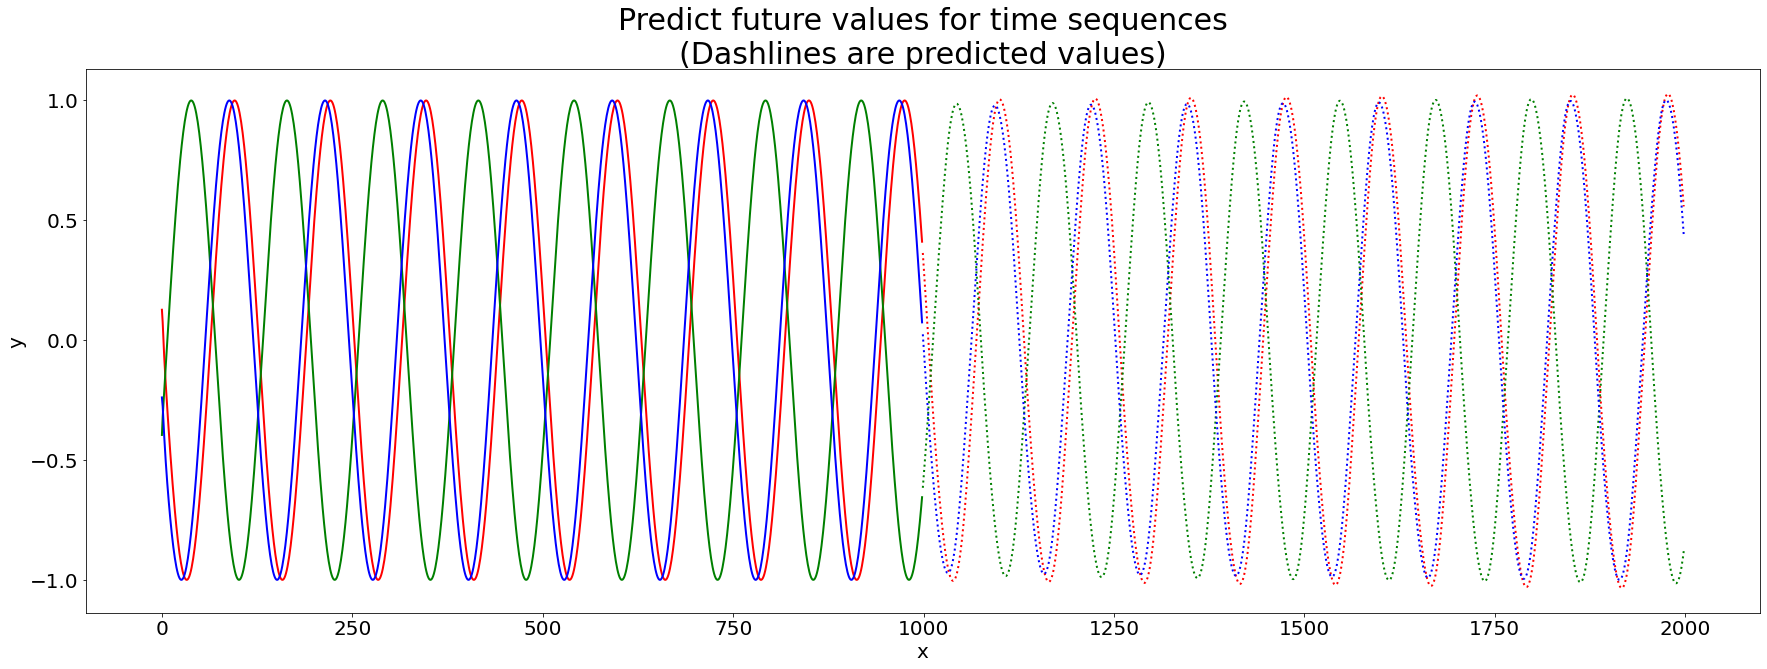

STEP:  14
loss: 3.6272425512850046e-06
loss: 3.622282856753549e-06
loss: 3.618917827093288e-06
loss: 3.6154536030443175e-06
loss: 3.6130514583364267e-06
loss: 3.610678712208443e-06
loss: 3.6080596173572473e-06
loss: 3.602031145553949e-06
loss: 3.5909501394333705e-06
loss: 3.5730252029400847e-06
loss: 3.677172194062808e-06
loss: 3.5286235593867332e-06
loss: 3.5060434187542224e-06
loss: 3.4454501509170734e-06
loss: 3.477560631030631e-06
loss: 3.4114406483189534e-06
loss: 3.415557617083207e-06
loss: 3.36740648767142e-06
loss: 3.3539529962483375e-06
loss: 3.3470159511402473e-06
test loss: 9.347618129894001e-06


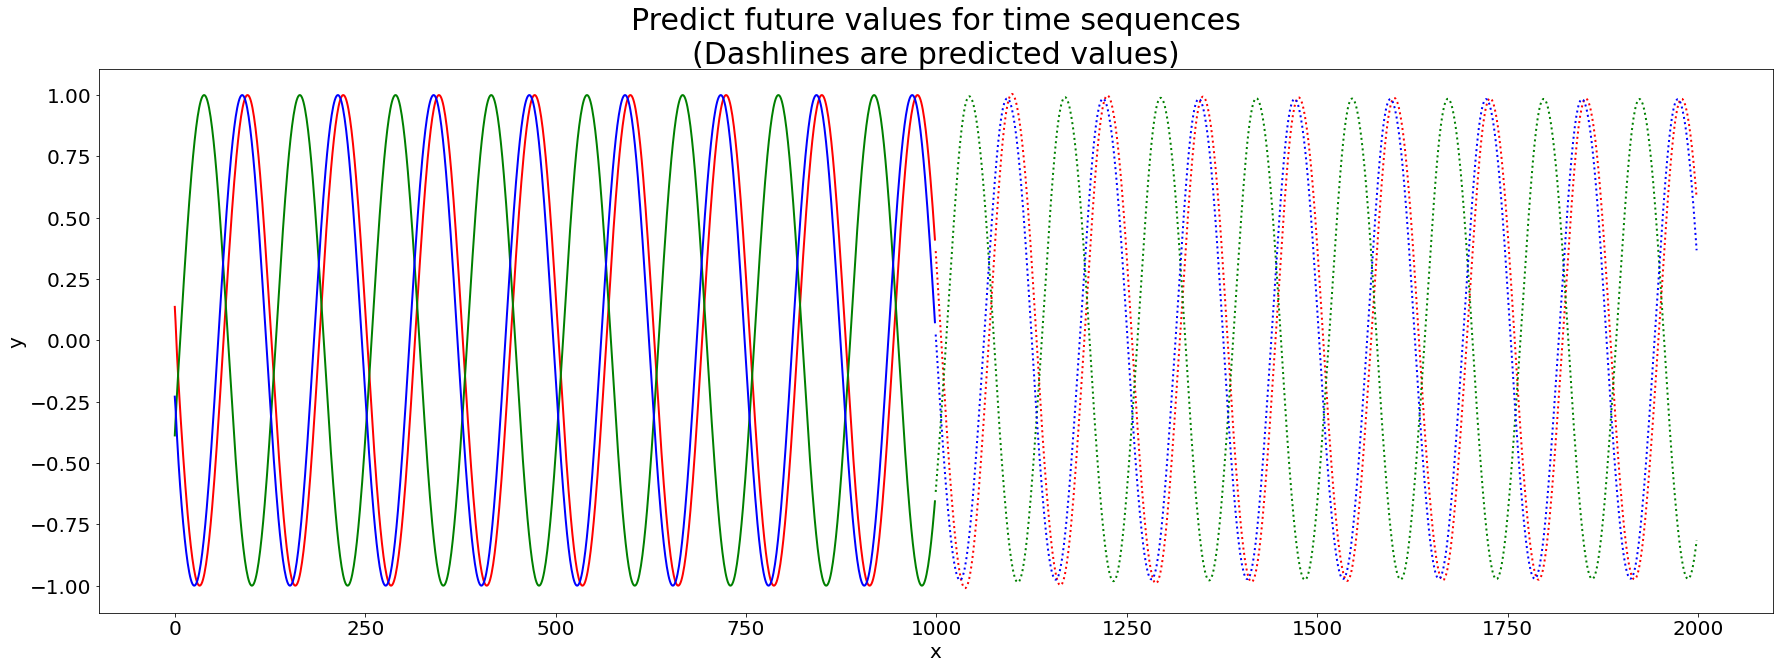

In [6]:
import torch.optim as optim
import matplotlib.pyplot as plt


np.random.seed(0)
torch.manual_seed(0)
    
    
input = torch.from_numpy(data[3:, :-1])
target = torch.from_numpy(data[3:, 1:])
test_input = torch.from_numpy(data[:3, :-1])
test_target = torch.from_numpy(data[:3, 1:])

# build the model
seq = Sequence()
seq.double()
criterion = nn.MSELoss()
# use LBFGS as optimizer since we can load the whole data to train
optimizer = optim.LBFGS(seq.parameters(), lr=0.8)
#begin to train
for i in range(15):
    print('STEP: ', i)
    def closure():
        optimizer.zero_grad()
        out = seq(input)
        loss = criterion(out, target)
        print('loss:', loss.item())
        loss.backward()
        return loss
    optimizer.step(closure)
    # begin to predict, no need to track gradient here
    with torch.no_grad():
        future = 1000
        pred = seq(test_input, future=future)
        loss = criterion(pred[:, :-future], test_target)
        print('test loss:', loss.item())
        y = pred.detach().numpy()
    # draw the result
    plt.figure(figsize=(30,10))
    plt.title('Predict future values for time sequences\n(Dashlines are predicted values)', fontsize=30)
    plt.xlabel('x', fontsize=20)
    plt.ylabel('y', fontsize=20)
    plt.xticks(fontsize=20)
    plt.yticks(fontsize=20)
    
    def draw(yi, color):
        plt.plot(np.arange(input.size(1)), yi[:input.size(1)], color, linewidth = 2.0)
        plt.plot(np.arange(input.size(1), input.size(1) + future), yi[input.size(1):], color + ':', linewidth = 2.0)
    
    draw(y[0], 'r')
    draw(y[1], 'g')
    draw(y[2], 'b')
    plt.show()

## Forecasting
 - First rule of forecasts - they are always wrong!
 - Hence, any forecast must be seen in combination with the associated uncertainty

## Text data

Textual data can also be seen as a time-series since it varies along a single dimension. There are two distinct ways of looking at this data - every character can be seen as an individual data point, or every word can be seen as a new data point. 

### Character-level

When working with text data at the character level, the advantage is that the set of possible inputs (all possible characters) is relatively small:

In [11]:
import string
all_letters = string.ascii_letters
n_letters = len(all_letters)
all_letters

'abcdefghijklmnopqrstuvwxyzABCDEFGHIJKLMNOPQRSTUVWXYZ'

However, an obvious disadvantage is the risk of _missing the forest for the trees_, i.e. higher-level patterns might be less obvious when looking at fine-grained data. 

### Exercise: Name-origin classifier
Given a dataset of common last names from different languages, classify a new (previously unseen) last name into one of the (seen) languages. 

In [12]:
# Explore dataset
import glob

all_filenames = glob.glob('data/names/*.txt')
print(all_filenames)

['data/names/Czech.txt', 'data/names/German.txt', 'data/names/Arabic.txt', 'data/names/Japanese.txt', 'data/names/Chinese.txt', 'data/names/Vietnamese.txt', 'data/names/Russian.txt', 'data/names/French.txt', 'data/names/Irish.txt', 'data/names/English.txt', 'data/names/Spanish.txt', 'data/names/Greek.txt', 'data/names/Italian.txt', 'data/names/Portuguese.txt', 'data/names/Scottish.txt', 'data/names/Dutch.txt', 'data/names/Korean.txt', 'data/names/Polish.txt']


In [13]:
import unicodedata
import string


# Turn a Unicode string to plain ASCII, thanks to http://stackoverflow.com/a/518232/2809427
def unicode_to_ascii(s):
    return ''.join(
        c for c in unicodedata.normalize('NFD', s)
        if unicodedata.category(c) != 'Mn'
        and c in all_letters
    )

print(unicode_to_ascii('Ślusàrski'))

Slusarski


In [14]:
# Build the category_lines dictionary, a list of names per language
category_lines = {}
all_categories = []

# Read a file and split into lines
def readLines(filename):
    lines = open(filename).read().strip().split('\n')
    return [unicode_to_ascii(line) for line in lines]

for filename in all_filenames:
    category = filename.split('/')[-1].split('.')[0]
    all_categories.append(category)
    lines = readLines(filename)
    category_lines[category] = lines

n_categories = len(all_categories)
print('n_categories =', n_categories)

n_categories = 18


In [15]:
print(category_lines['Italian'][:5])

['Abandonato', 'Abatangelo', 'Abatantuono', 'Abate', 'Abategiovanni']


#### Turning names into Tensors

We have loaded the names from the dataset into memory but our neural networks can only deal with Tensors so we need a tensor representation for a name. 

To represent each letter numerically, we could simply use its position in the alphabet, e.g. 1 for a, but this would imply an ordering between the letters - that in some way b > a. We don't want our model to learn such an ordering so we want a _non-ordinal_ representation. A common one is _one-hot encoding_. 

##### One-hot encoding

One-hot encoding generates vectors that are the size of number of all possible outcomes, and contain zeros everywhere except one location, which has a 1. 
e.g. To represent _Gender_, we could use 1 to represent _Male_ and 2 to represent _Female_ , but this would imply that _Female_ > _Male_ . So instead we use the vector [0 1] to represent _Male_ and the vector [1 0] to represent _Female_. 

In [16]:
import torch

# Just for demonstration, turn a letter into a <1 x n_letters> Tensor
def letter_to_tensor(letter):
    tensor = torch.zeros(1, n_letters)
    letter_index = all_letters.find(letter)
    tensor[0][letter_index] = 1
    return tensor

# Turn a line into a <line_length x 1 x n_letters>,
# or an array of one-hot letter vectors
def line_to_tensor(line):
    tensor = torch.zeros(len(line), 1, n_letters)
    for li, letter in enumerate(line):
        letter_index = all_letters.find(letter)
        tensor[li][0][letter_index] = 1
    return tensor

In [20]:
print(letter_to_tensor('k'))

tensor([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]])


In [21]:
print(line_to_tensor('Kukreja').size())

torch.Size([7, 1, 52])


#### The Network
![](RNN-network.png)

This RNN module (mostly copied from the PyTorch for Torch users tutorial) is just 2 linear layers which operate on an input and hidden state, with a LogSoftmax layer after the output.

In [37]:
import torch.nn as nn
from torch.autograd import Variable

class RNN(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(RNN, self).__init__()
        
        self.input_size = input_size
        self.hidden_size = hidden_size
        self.output_size = output_size
        
        self.i2h = nn.Linear(input_size + hidden_size, hidden_size)
        self.i2o = nn.Linear(input_size + hidden_size, output_size)
        self.softmax = nn.LogSoftmax(dim=1)
    
    def forward(self, input, hidden):
        combined = torch.cat((input, hidden), 1)
        hidden = self.i2h(combined)
        output = self.i2o(combined)
        output = self.softmax(output)
        return output, hidden

    def init_hidden(self):
        return Variable(torch.zeros(1, self.hidden_size))

Now let's test this module we created.

In [38]:
n_hidden = 128
rnn = RNN(n_letters, n_hidden, n_categories)

In [39]:
input = Variable(letter_to_tensor('A'))
hidden = rnn.init_hidden()

output, next_hidden = rnn(input, hidden)
print('output.size =', output.size())

output.size = torch.Size([1, 18])


In [60]:
input = Variable(line_to_tensor('Johnson'))
hidden = Variable(torch.zeros(1, n_hidden))

output, next_hidden = rnn(input[0], hidden)
print(output)

tensor([[-2.6856, -2.5714, -3.0723, -3.2854, -2.7149, -2.5032, -2.9389, -2.8802,
         -2.9216, -2.3959, -3.0254, -3.9383, -3.4954, -3.3459, -2.9526, -2.8648,
         -2.3887, -3.3496]], grad_fn=<LogSoftmaxBackward>)


In [61]:
def category_from_output(output):
    top_n, top_i = output.data.topk(1) # Tensor out of Variable with .data
    category_i = top_i[0][0]
    return all_categories[category_i], category_i

print(category_from_output(output))

import random

def random_training_pair():                                                                                                               
    category = random.choice(all_categories)
    line = random.choice(category_lines[category])
    category_tensor = Variable(torch.LongTensor([all_categories.index(category)]))
    line_tensor = Variable(line_to_tensor(line))
    return category, line, category_tensor, line_tensor

('Korean', tensor(16))


In [51]:
criterion = nn.NLLLoss()
learning_rate = 0.005 # If you set this too high, it might explode. If too low, it might not learn
optimizer = torch.optim.SGD(rnn.parameters(), lr=learning_rate)

Each loop of training will:
- Create input and target tensors
- Create a zeroed initial hidden state
- Read each letter in and
- Keep hidden state for next letter
- Compare final output to target
- Back-propagate
- Return the output and loss

In [55]:
def train(category_tensor, line_tensor):
    rnn.zero_grad()
    hidden = rnn.init_hidden()
    
    for i in range(line_tensor.size()[0]):
        output, hidden = rnn(line_tensor[i], hidden)

    loss = criterion(output, category_tensor)
    loss.backward()

    optimizer.step()

    return output, loss.item()

In [56]:
import time
import math

n_epochs = 100000
print_every = 5000
plot_every = 1000

# Keep track of losses for plotting
current_loss = 0
all_losses = []

def time_since(since):
    now = time.time()
    s = now - since
    m = math.floor(s / 60)
    s -= m * 60
    return '%dm %ds' % (m, s)

start = time.time()

for epoch in range(1, n_epochs + 1):
    # Get a random training input and target
    category, line, category_tensor, line_tensor = random_training_pair()
    output, loss = train(category_tensor, line_tensor)
    current_loss += loss
    
    # Print epoch number, loss, name and guess
    if epoch % print_every == 0:
        guess, guess_i = category_from_output(output)
        correct = '✓' if guess == category else '✗ (%s)' % category
        print('%d %d%% (%s) %.4f %s / %s %s' % (epoch, epoch / n_epochs * 100, time_since(start), loss, line, guess, correct))

    # Add current loss avg to list of losses
    if epoch % plot_every == 0:
        all_losses.append(current_loss / plot_every)
        current_loss = 0

5000 5% (0m 5s) 2.2052 Tosetti / Italian ✓
10000 10% (0m 10s) 2.9606 Offermans / Greek ✗ (Dutch)
15000 15% (0m 14s) 1.3876 Moon / Korean ✓
20000 20% (0m 19s) 2.3913 Pascoe / French ✗ (English)
25000 25% (0m 23s) 2.7382 Zamorano / Italian ✗ (Spanish)
30000 30% (0m 28s) 2.0827 Touma / Japanese ✗ (Arabic)
35000 35% (0m 33s) 2.7285 Quiros / Arabic ✗ (Spanish)
40000 40% (0m 37s) 1.2434 Nakamoto / Japanese ✓
45000 45% (0m 42s) 3.1032 Bata / Japanese ✗ (Arabic)
50000 50% (0m 46s) 2.6068 Wiater / German ✗ (Polish)
55000 55% (0m 51s) 1.8201 Simonis / Greek ✗ (Dutch)
60000 60% (0m 56s) 0.5873 Escarcega / Spanish ✓
65000 65% (1m 0s) 0.3327 Mach / Vietnamese ✓
70000 70% (1m 5s) 0.0038 Krakowski / Polish ✓
75000 75% (1m 9s) 0.1517 Kefalas / Greek ✓
80000 80% (1m 14s) 2.6730 Agramunt / French ✗ (Spanish)
85000 85% (1m 18s) 0.0667 Macclelland / Irish ✓
90000 90% (1m 23s) 0.0661 Antoniadis / Greek ✓
95000 95% (1m 27s) 0.3941 Sin / Korean ✓
100000 100% (1m 32s) 0.5840 Lemieux / French ✓


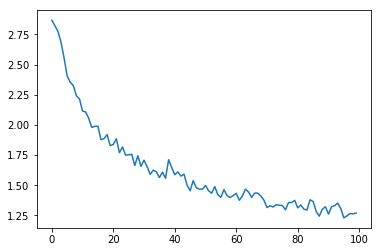

In [57]:
# Plot the evolution of the loss function through the training process

import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
%matplotlib inline

plt.figure()
plt.plot(all_losses)

We see the loss function going down through the training iterations - the network is learning.

Next, let's plot the confusion matrix.

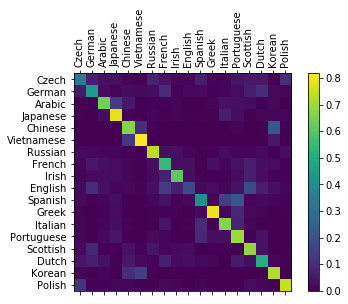

In [62]:
# Keep track of correct guesses in a confusion matrix
confusion = torch.zeros(n_categories, n_categories)
n_confusion = 10000

# Just return an output given a line
def evaluate(line_tensor):
    hidden = rnn.init_hidden()
    
    for i in range(line_tensor.size()[0]):
        output, hidden = rnn(line_tensor[i], hidden)
    
    return output

# Go through a bunch of examples and record which are correctly guessed
for i in range(n_confusion):
    category, line, category_tensor, line_tensor = random_training_pair()
    output = evaluate(line_tensor)
    guess, guess_i = category_from_output(output)
    category_i = all_categories.index(category)
    confusion[category_i][guess_i] += 1

# Normalize by dividing every row by its sum
for i in range(n_categories):
    confusion[i] = confusion[i] / confusion[i].sum()

# Set up plot
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(confusion.numpy())
fig.colorbar(cax)

# Set up axes
ax.set_xticklabels([''] + all_categories, rotation=90)
ax.set_yticklabels([''] + all_categories)

# Force label at every tick
ax.xaxis.set_major_locator(ticker.MultipleLocator(1))
ax.yaxis.set_major_locator(ticker.MultipleLocator(1))

plt.show()

We can see that our network is doing very well with Greek, but very bad with English!

Running on user input

In [63]:
def predict(input_line, n_predictions=3):
    print('\n> %s' % input_line)
    output = evaluate(Variable(line_to_tensor(input_line)))

    # Get top N categories
    topv, topi = output.data.topk(n_predictions, 1, True)
    predictions = []

    for i in range(n_predictions):
        value = topv[0][i]
        category_index = topi[0][i]
        print('(%.2f) %s' % (value, all_categories[category_index]))
        predictions.append([value, all_categories[category_index]])

In [75]:
predict("Michalikova")


> Michalikova
(-0.52) Czech
(-1.61) Japanese
(-2.01) Russian


### Exercise: Name generator

Now let's modify the previous example to build a name generator instead. First, some utility functions.

In [1]:
from __future__ import unicode_literals, print_function, division
from io import open
import glob
import os
import unicodedata
import string

all_letters = string.ascii_letters + " .,;'-"
n_letters = len(all_letters) + 1 # Plus EOS marker

def findFiles(path): return glob.glob(path)

# Turn a Unicode string to plain ASCII, thanks to https://stackoverflow.com/a/518232/2809427
def unicodeToAscii(s):
    return ''.join(
        c for c in unicodedata.normalize('NFD', s)
        if unicodedata.category(c) != 'Mn'
        and c in all_letters
    )

# Read a file and split into lines
def readLines(filename):
    lines = open(filename, encoding='utf-8').read().strip().split('\n')
    return [unicodeToAscii(line) for line in lines]

# Build the category_lines dictionary, a list of lines per category
category_lines = {}
all_categories = []
for filename in findFiles('data/names/*.txt'):
    category = os.path.splitext(os.path.basename(filename))[0]
    all_categories.append(category)
    lines = readLines(filename)
    category_lines[category] = lines

n_categories = len(all_categories)

if n_categories == 0:
    raise RuntimeError('Data not found. Make sure that you downloaded data '
        'from https://download.pytorch.org/tutorial/data.zip and extract it to '
        'the current directory.')

print('# categories:', n_categories, all_categories)
print(unicodeToAscii("O'Néàl"))

# categories: 18 ['Czech', 'German', 'Arabic', 'Japanese', 'Chinese', 'Vietnamese', 'Russian', 'French', 'Irish', 'English', 'Spanish', 'Greek', 'Italian', 'Portuguese', 'Scottish', 'Dutch', 'Korean', 'Polish']
O'Neal


#### The Network
This time we use a slightly modified version of the previous network:
![](RNN-generator.png)

This version has an added input for the category tensor, where we specify which origin name we would like the network to generate. This category will be another one-hot tensor like the letter input. 

Another change is the addition of a dropout layer before the softmax. This allows for some randomization to increase the sampling variety.

In [2]:
import torch
import torch.nn as nn

class RNN(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(RNN, self).__init__()
        self.hidden_size = hidden_size

        self.i2h = nn.Linear(n_categories + input_size + hidden_size, hidden_size)
        self.i2o = nn.Linear(n_categories + input_size + hidden_size, output_size)
        self.o2o = nn.Linear(hidden_size + output_size, output_size)
        self.dropout = nn.Dropout(0.1)
        self.softmax = nn.LogSoftmax(dim=1)

    def forward(self, category, input, hidden):
        input_combined = torch.cat((category, input, hidden), 1)
        hidden = self.i2h(input_combined)
        output = self.i2o(input_combined)
        output_combined = torch.cat((hidden, output), 1)
        output = self.o2o(output_combined)
        output = self.dropout(output)
        output = self.softmax(output)
        return output, hidden

    def initHidden(self):
        return torch.zeros(1, self.hidden_size)

Some additional helper functions

In [3]:
import random

# Random item from a list
def randomChoice(l):
    return l[random.randint(0, len(l) - 1)]

# Get a random category and random line from that category
def randomTrainingPair():
    category = randomChoice(all_categories)
    line = randomChoice(category_lines[category])
    return category, line

For each timestep (that is, for each letter in a training word) the inputs of the network will be (category, current letter, hidden state) and the outputs will be (next letter, next hidden state). So for each training set, we’ll need the category, a set of input letters, and a set of output/target letters.

Since we are predicting the next letter from the current letter for each timestep, the letter pairs are groups of consecutive letters from the line - e.g. for "ABCD<EOS>" we would create (“A”, “B”), (“B”, “C”), (“C”, “D”), (“D”, “EOS”).

In [4]:
import time
import math

# One-hot vector for category
def categoryTensor(category):
    li = all_categories.index(category)
    tensor = torch.zeros(1, n_categories)
    tensor[0][li] = 1
    return tensor

# One-hot matrix of first to last letters (not including EOS) for input
def inputTensor(line):
    tensor = torch.zeros(len(line), 1, n_letters)
    for li in range(len(line)):
        letter = line[li]
        tensor[li][0][all_letters.find(letter)] = 1
    return tensor

# LongTensor of second letter to end (EOS) for target
def targetTensor(line):
    letter_indexes = [all_letters.find(line[li]) for li in range(1, len(line))]
    letter_indexes.append(n_letters - 1) # EOS
    return torch.LongTensor(letter_indexes)

# Make category, input, and target tensors from a random category, line pair
def randomTrainingExample():
    category, line = randomTrainingPair()
    category_tensor = categoryTensor(category)
    input_line_tensor = inputTensor(line)
    target_line_tensor = targetTensor(line)
    return category_tensor, input_line_tensor, target_line_tensor

def timeSince(since):
    now = time.time()
    s = now - since
    m = math.floor(s / 60)
    s -= m * 60
    return '%dm %ds' % (m, s)

Now we define the training function. Note that in contrast to the classification train function, we now use the output of the network at every step instead of only at the end. 

In [5]:
criterion = nn.NLLLoss()

learning_rate = 0.0005

def train(category_tensor, input_line_tensor, target_line_tensor):
    target_line_tensor.unsqueeze_(-1)
    hidden = rnn.initHidden()

    rnn.zero_grad()

    loss = 0

    for i in range(input_line_tensor.size(0)):
        output, hidden = rnn(category_tensor, input_line_tensor[i], hidden)
        l = criterion(output, target_line_tensor[i])
        loss += l

    loss.backward()

    for p in rnn.parameters():
        p.data.add_(-learning_rate, p.grad.data)

    return output, loss.item() / input_line_tensor.size(0)

The training loop

In [ ]:
rnn = RNN(n_letters, 128, n_letters)

n_iters = 100000
print_every = 5000
plot_every = 500
all_losses = []
total_loss = 0 # Reset every plot_every iters

start = time.time()

for iter in range(1, n_iters + 1):
    output, loss = train(*randomTrainingExample())
    total_loss += loss

    if iter % print_every == 0:
        print('%s (%d %d%%) %.4f' % (timeSince(start), iter, iter / n_iters * 100, loss))

    if iter % plot_every == 0:
        all_losses.append(total_loss / plot_every)
        total_loss = 0

0m 16s (5000 5%) 2.8644
0m 32s (10000 10%) 2.4803
0m 48s (15000 15%) 2.8819
1m 5s (20000 20%) 2.4158
1m 20s (25000 25%) 2.6072
1m 36s (30000 30%) 2.5882


Plot the losses to see the progress of training:

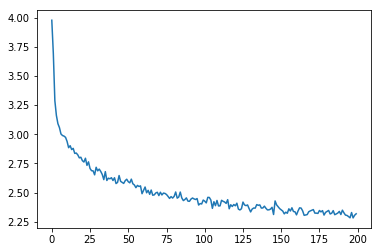

In [109]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

plt.figure()
plt.plot(all_losses)

#### Sampling from the network

Now we will write the function that generates names using this network. To sample, we feed in a category (name origin), as well as a first letter as a seed - and ask the network what the next letter is. Next, keeping the category the same, we feed in the second letter (generated by the network in the previous step) as the seed and ask for the next letter, and so on until we get the EOS (end-of-string) token.

In [117]:
max_length = 20

# Sample from a category and starting letter
def sample(category, start_letter='A'):
    with torch.no_grad():  # no need to track history in sampling
        category_tensor = categoryTensor(category)
        input = inputTensor(start_letter)
        hidden = rnn.initHidden()

        output_name = start_letter

        for i in range(max_length):
            output, hidden = rnn(category_tensor, input[0], hidden)
            topv, topi = output.topk(1)
            topi = topi[0][0]
            if topi == n_letters - 1:
                break
            else:
                letter = all_letters[topi]
                output_name += letter
            input = inputTensor(letter)

        return output_name

# Get multiple samples from one category and multiple starting letters
def samples(category, start_letters='ABC'):
    for start_letter in start_letters:
        print(sample(category, start_letter))

samples('Russian', 'RUS')
print("***")
samples('German', 'GER')
print("***")
samples('Spanish', 'SPA')


Rakin
Uanton
Sharint
***
Garter
Eren
Romant
***
Sarta
Pare
Artan


# Recent Advances

The long-term memory in LSTM is a specific instance of a more generic concept called _Attention_. The concept of Attention was introduced to solve one problem - when doing _Neural Machine Translation_, the next word in the output sentence (in the output language) is not necessary related to the last (or second-to-last) word in the input sentence (in the input language). Since simple RNNs can only capture adjacency relationships, various styles of attention were tried to teach the model to look at a specific part of the input sentence in order to predict the next output word. Many of these attention approaches were successful and today far outperform LSTMs on the above tasks. 

TODO add photo of self-attention

One extremely successful kind of attention is _self attention_. Here, instead of mapping relationships between an output sequence and an input sequence, we map relationships between the different words of the same sentence. Going down this path, it was realised that the self-attention mechanism is more than just an add-on to RNNs and it might be possible to build entire networks out of self-attention alone. In "Attention is all you need" (Vasuvani 2017) a neural network architecture called _Transformer_ was introduced that was composed entirely of self attention layers, and had some other innovations regarding memory. 

TODO add photo of transformer

In (TODO check date), a company called OpenAI introduced a variation of the transformer called GPT2 and refused to release it _claiming it might destroy human society_ (TODO confirm exact statement). This was a text generation model that could generate entire (_fake_) news articles from a one/few word prompt - think of it as autocomplete on steroids. They did eventually release it and is now available to try online: https://talktotransformer.com